In [2]:
import os
#os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152z
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

# Input data files are available in the "../input/" directory.
# For example, running this will list the files in the input directory
print(os.listdir("kpiAnomalyDetection/input"))

import numpy as np   # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn
import keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale
print(np.__version__)

train_df = pd.read_csv('kpiAnomalyDetection/input/train.csv')
test_df = pd.read_csv('kpiAnomalyDetection/input/test.csv')
train_df

['train.csv', 'test.csv']


Using TensorFlow backend.


1.17.3


,timestamp,value,label,KPI ID
0,1493568000,1.901639,0,02e99bd4f6cfb33f
1,1493568060,1.786885,0,02e99bd4f6cfb33f
2,1493568120,2.000000,0,02e99bd4f6cfb33f
3,1493568180,1.885246,0,02e99bd4f6cfb33f
4,1493568240,1.819672,0,02e99bd4f6cfb33f
5,1493568300,1.885246,0,02e99bd4f6cfb33f
6,1493568360,1.885246,0,02e99bd4f6cfb33f
7,1493568420,1.934426,0,02e99bd4f6cfb33f
8,1493568480,1.967213,0,02e99bd4f6cfb33f
9,1493568540,1.950820,0,02e99bd4f6cfb33f


In [3]:
kpi_id, indexes, count= np.unique(train_df['KPI ID'], return_index=True, return_counts=True)
print(kpi_id, '\n', indexes, '\n', count)
print(len(train_df), len(kpi_id), len(indexes))
indexes.sort()

['02e99bd4f6cfb33f' '046ec29ddf80d62e' '07927a9a18fa19ae'
 '09513ae3e75778a3' '18fbb1d5a5dc099d' '1c35dbf57f55f5e4'
 '40e25005ff8992bd' '54e8a140f6237526' '71595dd7171f4540'
 '769894baefea4e9e' '76f4550c43334374' '7c189dd36f048a6c'
 '88cf3a776ba00e7c' '8a20c229e9860d0c' '8bef9af9a922e0b3'
 '8c892e5525f3e491' '9bd90500bfd11edb' '9ee5879409dccef9'
 'a40b1df87e3f1c87' 'a5bf5d65261d859a' 'affb01ca2b4f0b45'
 'b3b2e6d1a791d63a' 'c58bfcbacb2822d1' 'cff6d3c01e6a6bfa'
 'da403e4e3f87c9e0' 'e0770391decc44ce'] 
 [      0 1030508 1039292  644017  514889  901655 1387132 1050252 1635015
 1075531 1084315 1782683 2410879 1066747 2068297 1240123  128562 2345430
 1930372  386210 2197750 1058500  772988 1487386  257175 1093099] 
 [128562   8784  10960 128971 129128 128853 100254   8248 147668   8784
   8784 147689  65436   8784 129453 147009 128613  65449 137925 128679
 147680   8247 128667 147629 129035 147024]
2476315 26 26


In [4]:
test_kpi_id, test_indexes, test_count= np.unique(test_df['KPI ID'], return_index=True, return_counts=True)
print(test_kpi_id, '\n', test_indexes, '\n', test_count)
print(len(test_df), len(test_kpi_id), len(test_indexes))
test_indexes.sort()
print(len(test_indexes))

['02e99bd4f6cfb33f' '046ec29ddf80d62e' '07927a9a18fa19ae'
 '09513ae3e75778a3' '18fbb1d5a5dc099d' '1c35dbf57f55f5e4'
 '40e25005ff8992bd' '54e8a140f6237526' '71595dd7171f4540'
 '769894baefea4e9e' '76f4550c43334374' '7c189dd36f048a6c'
 '88cf3a776ba00e7c' '8a20c229e9860d0c' '8bef9af9a922e0b3'
 '8c892e5525f3e491' '9bd90500bfd11edb' '9ee5879409dccef9'
 'a40b1df87e3f1c87' 'a5bf5d65261d859a' 'affb01ca2b4f0b45'
 'b3b2e6d1a791d63a' 'c58bfcbacb2822d1' 'cff6d3c01e6a6bfa'
 'da403e4e3f87c9e0' 'e0770391decc44ce'] 
 [      0  890749  899533  554843  443672  778633 1247376  910493 1503906
  935774  944558 1651575 2279775  926990 1937190 1100366  112627 2214325
 1799265  334925 2066644  918742  665847 1356277  222812  953342] 
 [112627   8784  10960 111004 111171 112116 108901   8249 147669   8784
   8784 147690  65436   8784 129454 147010 110185  65450 137925 108747
 147681   8248 112786 147629 112113 147024]
2345211 26 26
26


In [5]:
all_kpi_timeseries = []
all_kpi_labels = []
indexes = np.append(indexes,len(train_df))
print(len(indexes))
for i in range(len(indexes)-1):
    all_kpi_timeseries.append(np.asarray(train_df['value'][indexes[i]:indexes[i+1]]))
    all_kpi_labels.append(np.asarray(train_df['label'][indexes[i]:indexes[i+1]]))

27


In [6]:
test_all_kpi_timeseries = []
test_indexes = np.append(test_indexes,len(test_df))
print(len(test_indexes))
for i in range(len(test_indexes)-1):
    test_all_kpi_timeseries.append(np.asarray(test_df['value'][test_indexes[i]:test_indexes[i+1]]))

27


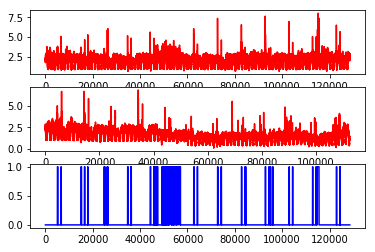

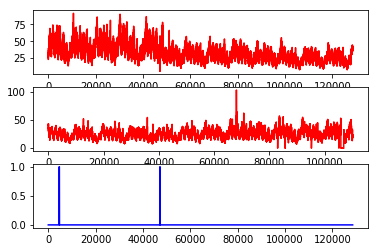

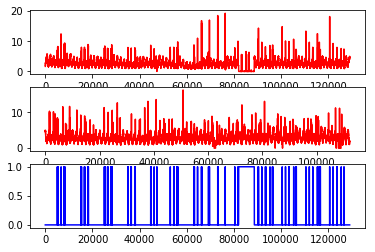

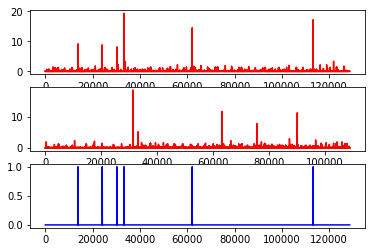

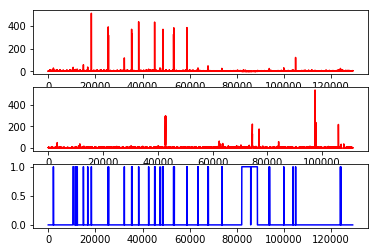

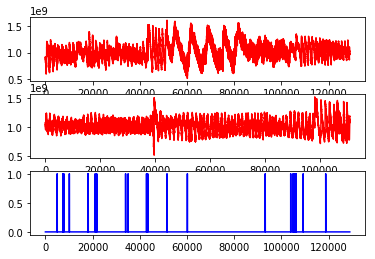

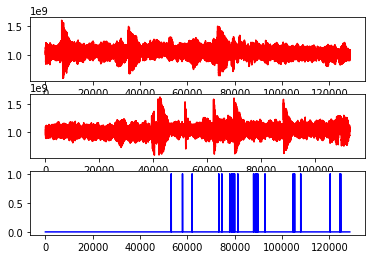

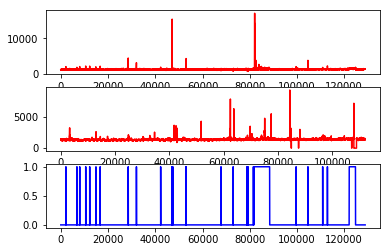

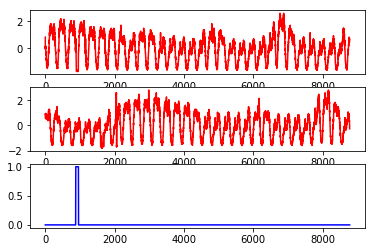

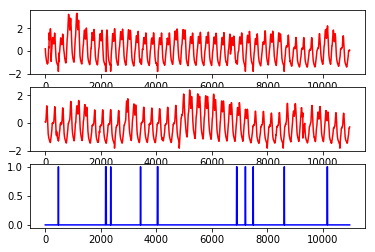

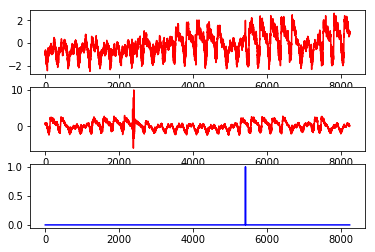

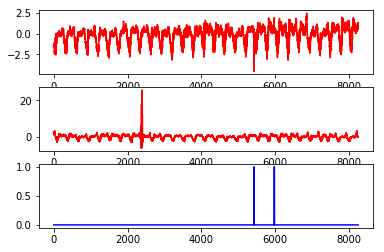

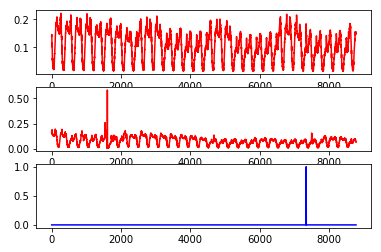

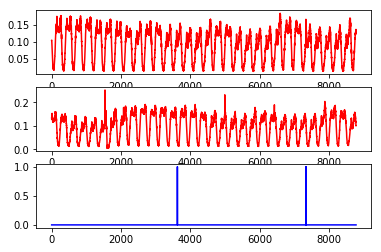

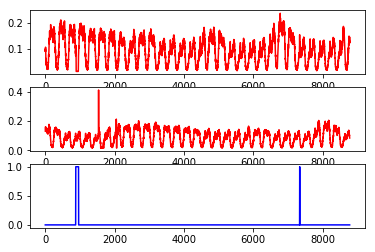

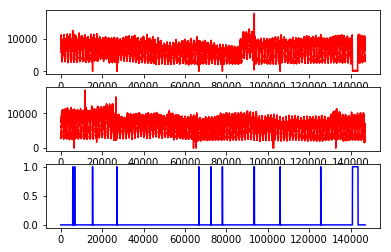

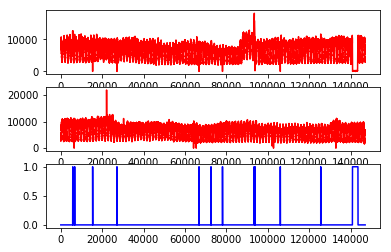

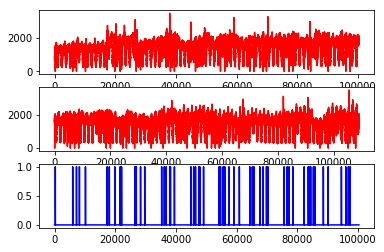

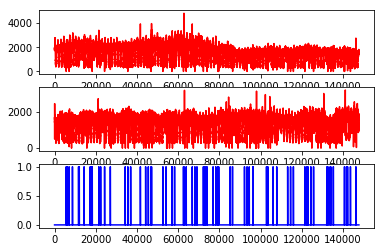

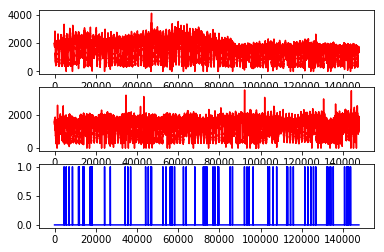

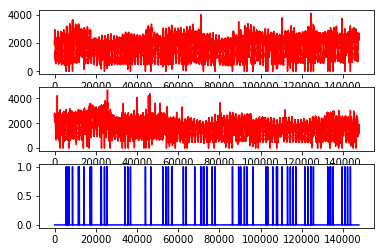

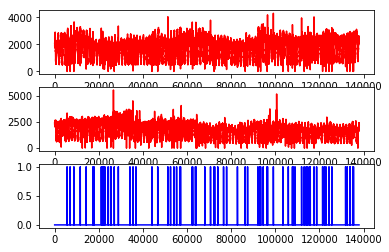

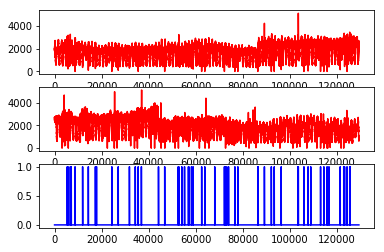

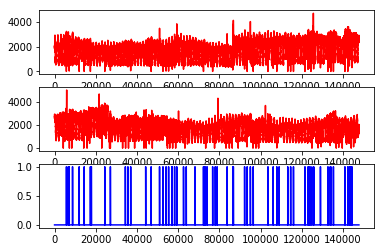

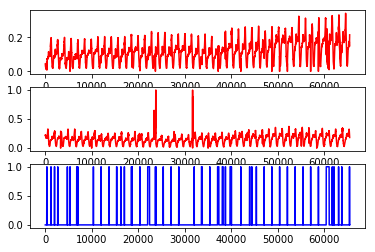

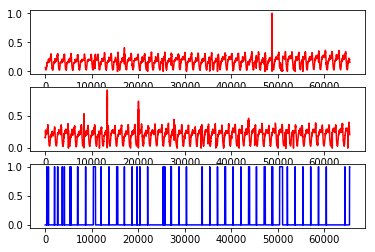

In [7]:
for i in range(len(all_kpi_timeseries)):
    plt.subplot(3,1,1)
    plt.plot(all_kpi_timeseries[i],'r')
    plt.subplot(3,1,2)
    plt.plot(test_all_kpi_timeseries[i],'r')
    plt.subplot(3,1,3)
    plt.plot(all_kpi_labels[i],'b')
    plt.show()


In [8]:
from statsmodels.tsa.api import SARIMAX, ExponentialSmoothing, SimpleExpSmoothing, Holt

In [ ]:
import dill 

In [8]:
def get_feature_logs(time_series):
    return np.log(time_series + 1e-2)

In [9]:
def get_feature_SARIMA_residuals(time_series):
    predict = SARIMAX(time_series,
                      trend='n', 
                      order=(5,1,1), 
                      measurement_error=True).fit().get_prediction()
    return time_series - predict.predicted_mean

def get_feature_AddES_residuals(time_series):
    predict = ExponentialSmoothing(time_series, trend='add').fit(smoothing_level=1)
    return time_series - predict.fittedvalues

def get_feature_SimpleES_residuals(time_series):
    predict = SimpleExpSmoothing(time_series).fit(smoothing_level=1)
    return time_series - predict.fittedvalues

def get_feature_Holt_residuals(time_series):
    predict = Holt(time_series).fit(smoothing_level=1)
    return time_series - predict.fittedvalues

In [10]:
def get_features_and_labels_from_a_time_series(time_series, time_series_label, Windows, delay):
    """
    Input: time_series, time_series_label, Window, delay (for determining vital data)
    
    In a time series dataset, it maintains a list of values.
    We'll convert the list of values into a list of feature vectors,
    each feature vector corresponds to a time point in the time series.
    
    For example: a time series [1,2,3,4,5] --> a featured dataset [[1,2,3],[2,3,4],[3,4,5]] (use one window size 3)
    
    The labels for the feature vectors are remained and returned.
    
    time_series: a list of values, an array
    time_series_label: a list of labels, an array
    Windows: the window sizes for time series feature extraction, an array
    delay: the maximum delay for effectively detect an anomaly
    
    Output: features_for_the_timeseries (a list of arrays), 
            labels_for_the_timeseries (a list of arrays), 
            vital_labels_for_the_timeseries (a list of arrays)
    """    
    data = []
    data_label = []
    data_label_vital = []
    
    start_point = 2*max(Windows)
    start_accum = 0
    
    # features from tsa models
    time_series_SARIMA_residuals = get_feature_SARIMA_residuals(time_series)
    time_series_AddES_residuals = get_feature_AddES_residuals(time_series)
    time_series_SimpleES_residuals = get_feature_SimpleES_residuals(time_series)
    time_Series_Holt_residuals = get_feature_Holt_residuals(time_series)
    
    # features from tsa models for time series logarithm
    time_series_logs = get_feature_logs(time_series)
    
    for i in np.arange(start_point, len(time_series)):        
        # the datum to put into the data pool
        datum = []
        datum_label = time_series_label[i]        
        
        # fill the datum with f01-f09
        diff_plain = time_series[i] - time_series[i-1]
        start_accum = start_accum + time_series[i]
        mean_accum = (start_accum)/(i-start_point+1)
        
        # f01-f04: residuals
        datum.append(time_series_SARIMA_residuals[i])
        datum.append(time_series_AddES_residuals[i])
        datum.append(time_series_SimpleES_residuals[i])
        datum.append(time_Series_Holt_residuals[i])
        # f05: logarithm
        datum.append(time_series_logs[i])
        
        # f06: diff
        datum.append(diff_plain)
        # f07: diff percentage
        datum.append(diff_plain/(time_series[i-1] + 1e-10))  # to avoid 0, plus 1e-10
        # f08: diff of diff - derivative
        datum.append(diff_plain - (time_series[i-1] - time_series[i-2]))
        # f09: diff of accumulated mean and current value
        datum.append(time_series[i] - mean_accum)

        # fill the datum with features related to windows
        # loop over different windows size to fill the datum
        for k in Windows:
            mean_w = np.mean(time_series[i-k:i+1])
            var_w = np.mean((np.asarray(time_series[i-k:i+1]) - mean_w)**2)
            #var_w = np.var(time_series[i-k:i+1])
            
            mean_w_and_1 = mean_w + (time_series[i-k-1]-time_series[i])/(k+1)
            var_w_and_1 = np.mean((np.asarray(time_series[i-k-1:i]) - mean_w_and_1)**2)
            #mean_w_and_1 = np.mean(time_series[i-k-1:i])
            #var_w_and_1 = np.var(time_series[i-k-1:i])
            
            mean_2w = np.mean(time_series[i-2*k:i-k+1])
            var_2w = np.mean((np.asarray(time_series[i-2*k:i-k+1]) - mean_2w)**2)
            #var_2w = np.var(time_series[i-2*k:i-k+1])
            
            # diff of sliding windows
            diff_mean_1 = mean_w - mean_w_and_1
            diff_var_1 = var_w - var_w_and_1
            
            # diff of jumping windows
            diff_mean_w = mean_w - mean_2w
            diff_var_w = var_w - var_2w
            
            # f1
            datum.append(mean_w)  # [0:2] is [0,1]
            # f2
            datum.append(var_w)
            # f3
            datum.append(diff_mean_1)
            # f4
            datum.append(diff_mean_1/(mean_w_and_1 + 1e-10))
            # f5
            datum.append(diff_var_1)
            # f6
            datum.append(diff_var_1/(var_w_and_1 + 1e-10))
            # f7
            datum.append(diff_mean_w)
            # f8
            datum.append(diff_mean_w/(mean_2w + 1e-10))
            # f9
            datum.append(diff_var_w)
            # f10
            datum.append(diff_var_w/(var_2w + 1e-10))
            
            # diff of sliding/jumping windows and current value
            # f11
            datum.append(time_series[i] - mean_w_and_1)
            # f12
            datum.append(time_series[i] - mean_2w)

        data.append(np.asarray(datum))
        data_label.append(np.asarray(datum_label))

        # an important step is to identify the start anomalous points which are said to be critical
        # if the anomaly is detected within delay window of the occurence of the first anomaly
        if datum_label == 1 and sum(time_series_label[i-delay:i]) < delay:
            data_label_vital.append(np.asarray(1))
        else:
            data_label_vital.append(np.asarray(0))
            
    return data, data_label, data_label_vital

In [11]:
num_of_feature_with_value = 9
num_of_feature_with_window = 12


In [12]:
def get_expanded_featuers_and_labels(data_pool, data_pool_label, data_pool_label_vital, oversample=0):
    
    assert(len(data_pool) == len(data_pool_label) == len(data_pool_label_vital))

    if oversample == 0:
        return data_pool, data_pool_label
    
    data_pool_len = len(data_pool)
    
    # the data points and labels to be appended into the data/label pool
    data_pool_plus = []
    data_pool_plus_label = []
    for i in np.arange(data_pool_len):
        if data_pool_label[i] == 1: # anomalous point
            data_pool_plus.append(data_pool[i])
            data_pool_plus_label.append(data_pool_label[i])

    # the data points and labels to be appended into the data/label pool (critical ones)
    data_pool_vital = []
    data_pool_vital_label = []
    for i in np.arange(data_pool_len):
        if data_pool_label_vital[i] == 1: # vital anomalous point
            data_pool_vital.append(data_pool[i])
            data_pool_vital_label.append(data_pool_label_vital[i])

    # oversample abnormal data instances and vital abnormal data instances to balance the dataset
    data_pool_complete = data_pool + \
                         oversample * data_pool_plus + \
                         oversample * data_pool_vital

    data_pool_complete_label = data_pool_label + \
                               oversample * data_pool_plus_label + \
                               oversample * data_pool_vital_label

    assert(len(data_pool_complete) == len(data_pool_complete_label))
    print('The augment size of the dataset: %d = %d + %d * %d + %d * %d' %(len(data_pool_complete),
                                                                           len(data_pool),
                                                                           oversample,
                                                                           len(data_pool_plus),
                                                                           oversample,
                                                                           len(data_pool_vital)))

    # data_pool_complete (X) and data_pool_complete_label (y) should be ready for training
    return data_pool_complete, data_pool_complete_label

In [15]:
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import maxabs_scale

import random
# 1) feature engineering for training dataset
# specify the set of window sizes
# the maximum number is 125 means the start point to consider anomalies is 250, i.e., max(2W).
W = np.asarray([2, 5, 10, 25, 50, 100, 200, 300, 400, 500])
delay = 7

# training: data pool for labeled data points (presented by 6n+2 features)
train_data_pool = []
train_data_pool_label = []
train_data_pool_label_vital = []

# loop over all the time series
for i in np.arange(len(all_kpi_timeseries)):    
    # loop over all the data points in each time series
    data, \
    data_label, \
    data_label_vital = get_features_and_labels_from_a_time_series(all_kpi_timeseries[i],
                                                                  all_kpi_labels[i],
                                                                  W, delay)
    train_data_pool = train_data_pool + list(scale(np.asarray(data)))
    #train_data_pool = train_data_pool + list(minmax_scale(abs(np.asarray(data))))
    #train_data_pool = train_data_pool + list(maxabs_scale(np.asarray(data)))
    
    train_data_pool_label = train_data_pool_label + data_label
    train_data_pool_label_vital = train_data_pool_label_vital + data_label_vital
    
# 2) over sampling
# the methodology to achieve over sampling is to pick samples from train_data according to train_data_label
# data_pool + data_pool_plus + data_pool_vital, there are three datasets to be merged
# data_pool_label + data_pool_plus_label + data_pool_vital_label, there are three label datasets to be merged
train_data_pool_complete, \
train_data_pool_complete_label = get_expanded_featuers_and_labels(train_data_pool, 
                                                                  train_data_pool_label, 
                                                                  train_data_pool_label_vital)

# default oversampling is set to 0, so we do not use oversampling currenlty.

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn(

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need t

In [16]:
# feature engineering for testing dataset, a list of sequences
test_data_pool = []

# loop over all the time series
for i in np.arange(len(test_all_kpi_timeseries)):        
    # loop over all the data points in each time series
    data, \
    data_label, \
    data_label_vital = get_features_and_labels_from_a_time_series(test_all_kpi_timeseries[i],
                                                                  all_kpi_labels[i],
                                                                  W, delay)
    
    test_data_pool = test_data_pool + [list(scale(np.asarray(data)))]
    #test_data_pool = test_data_pool + [list(minmax_scale(abs(np.asarray(data))))]
    #test_data_pool = test_data_pool + [list(maxabs_scale(np.asarray(data)))]    

# due to the use of sliding windows, there should has (example):
print('The length of a time series, e.g., %d, is %d longer than that of its feature vectors, e.g., %d.' 
      %(len(test_time_series_dataset_scaled[0]), 2*max(W), len(test_data_pool[0])))

/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encoun

IndexError: index 8248 is out of bounds for axis 0 with size 8248

In [17]:
# import Keras libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# fix random seed for reproducibility
np.random.seed(5)

In [18]:
"""
The dropout machanism is expected to enhance the generalization capability of the model,
but it takes more epochs to train and, if not trained for more epochs, may lead to degraded performance.
# create ANN model
model = Sequential()
model.add(Dense(256, input_dim=num_of_feature_with_window*len(W) + num_of_feature_with_value, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
"""

# we can think of this chunk as the input layer
model = Sequential()
#model.add(Dense(1024, input_dim=num_of_feature_with_window*len(W) + num_of_feature_with_value, 
#                bias_regularizer=l2(0.01),
#                kernel_regularizer=l2(0.01)))
model.add(Dense(1024, input_dim=num_of_feature_with_window*len(W) + num_of_feature_with_value))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

# we can think of this chunk as the hidden layer    
#model.add(Dense(256, 
#                bias_regularizer=l2(0.01),
#                kernel_regularizer=l2(0.01)))
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

# we can think of this chunk as the output layer
#model.add(Dense(1,
#                bias_regularizer=l2(0.01),
#                kernel_regularizer=l2(0.01)))
model.add(Dense(1))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))

# Compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [19]:
train_data_pool_complete_Xt = train_data_pool_complete
train_data_pool_complete_yt = train_data_pool_complete_label
train_data_pool_complete_weight = (99 * np.asarray(train_data_pool_label_vital)) + 1

In [1]:
import time
# Fit the model
assert(len(train_data_pool_complete_Xt) == 
       len(train_data_pool_complete_yt) == len(train_data_pool_complete_weight))

print('Keras: start to train DNN!')
start_time = time.time()

class_weight = {0:1., 1:1000.}

# sample_weight is used when the dataset is not augmented
model.fit(np.asarray(train_data_pool_complete_Xt), 
          np.ravel(train_data_pool_complete_yt), 
          epochs=200, 
          batch_size=5000, 
          class_weight=class_weight,
          sample_weight=train_data_pool_complete_weight,
          verbose=1)

end_time = time.time()
print('It took %d seconds to train the model!' %(end_time-start_time))

NameError: name 'train_data_pool_complete_Xt' is not defined